In [3]:
import torch
import torchvision
n_epochs = 3
batch_size_test = 3000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
import torch
import torch.nn as nn
import torchvision

In [103]:
class RBFNet(nn.Module):
    def __init__(self):
        super(RBFNet, self).__init__()
        self.hidden_dim = 100
        self.output_dim = 4
        self.num_centers = 4
        
        self.centers = nn.Parameter(torch.randn(4, 12288))
        self.beta = nn.Parameter(torch.ones(num_centers, 1) / num_centers)
        self.sigma = sigma
        
        self.fc = nn.Linear(num_centers, output_dim)
    
    def radial_basis(self, x):
        C = self.centers.view(self.num_centers, -1)
        return torch.exp(-torch.sum((x - C) ** 2, dim=1) / (2 * self.sigma ** 2))
    
    def forward(self, x):
        batch_size = x.size(0)
        x = x.view(batch_size, -1)
        H = self.radial_basis(x)
        out = self.fc(H)
        return out

In [104]:
hidden_dim = 100
output_dim = 4
num_centers= 4
sigma = 1.0

In [105]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('C:/Users/vishn/Downloads/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset', transform=train_transforms)
test_dataset = datasets.ImageFolder('C:/Users/vishn/Downloads/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

In [107]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape
#shape12288

torch.Size([4, 3, 64, 64])

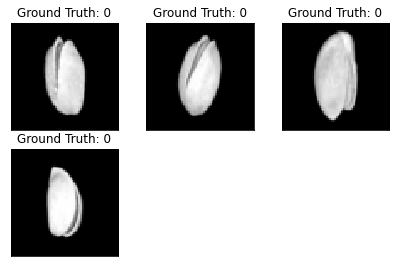

In [109]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(4):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [110]:
criterion = nn.CrossEntropyLoss()
# specify optimizer
model=RBFNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        #optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        #model=RBF(data)
        model.train()
        output = model(data)
        # calculate the loss
        loss = criterion(output.float(), target.float())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        #optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1,train_loss))

Epoch: 1 	Training Loss: 2.413238
Epoch: 2 	Training Loss: 2.420463
Epoch: 3 	Training Loss: 2.438056
Epoch: 4 	Training Loss: 2.419271
Epoch: 5 	Training Loss: 2.423339
Epoch: 6 	Training Loss: 2.428745
Epoch: 7 	Training Loss: 2.413533
Epoch: 8 	Training Loss: 2.443355
Epoch: 9 	Training Loss: 2.412186
Epoch: 10 	Training Loss: 2.437538


In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('C:/Users/vishn/Downloads/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset', transform=train_transforms)
test_dataset = datasets.ImageFolder('C:/Users/vishn/Downloads/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('pistachio')
dataiter = iter(train_loader
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images)
writer.add_image('pistachio', img_grid)
writer.close()

In [25]:
%load_ext tensorboard

%tensorboard --logdir="runs"